<a href="https://colab.research.google.com/github/muhh-b/YOLOv4_demo/blob/main/PyTorch_YOLOv4_demonstration_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the necessary dependencies by running the following commands in a code cell: 
* Clone the Darknet repository from GitHub
* Build Darknet repositroy
* Download the YOLOv4 configuration file (yolov4.cfg) and weights file (yolov4.weights) from the Darknet repository on GitHub

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.18 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


In [ ]:

%cd darknet
!make
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights
!pip install opencv-python numpy


/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
  253 |                 int n = _write(client, outputbuf, outlen);
      |                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<detection_t>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
  867 |         for

Then I created a plain text file called classes.names with 80 classes the same as the number of class labels in the YOLOv4 model to ensure that they match.

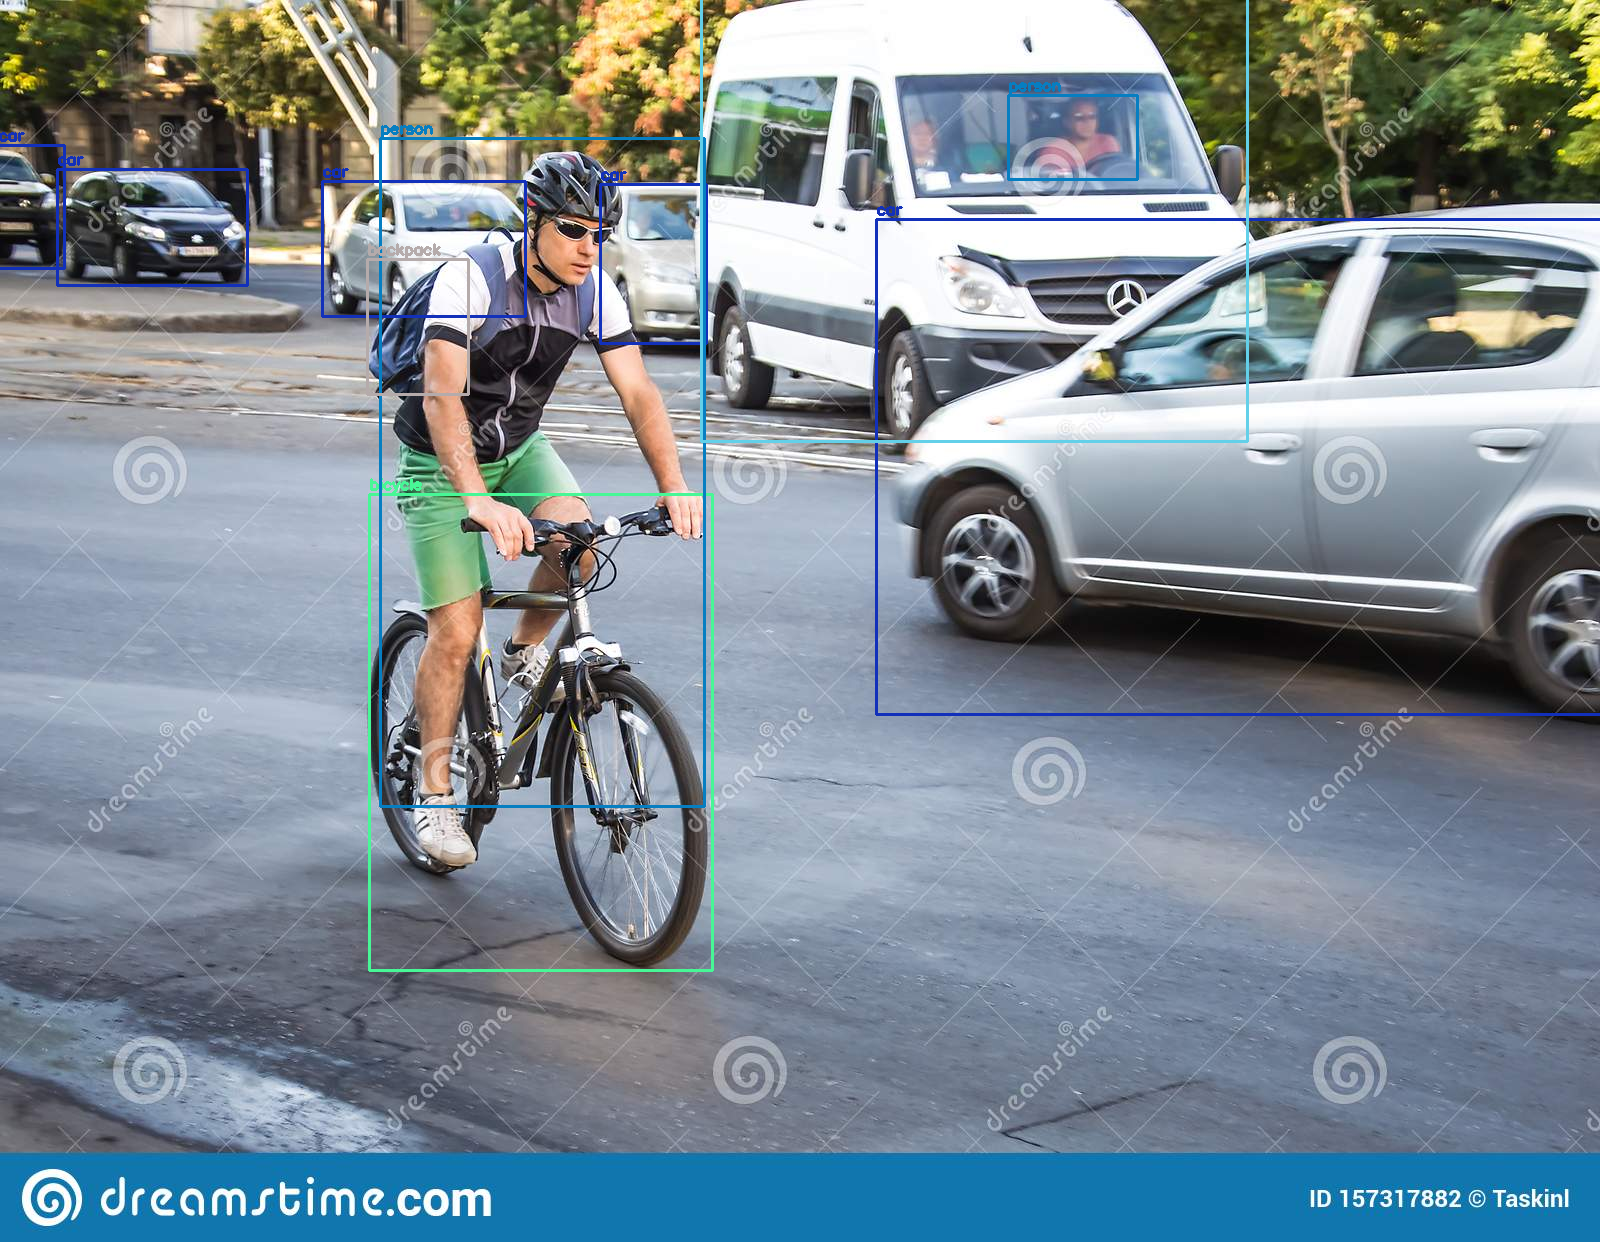

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLOv4 config and weights
net = cv2.dnn.readNetFromDarknet('/content/darknet/yolov4.cfg', '/content/darknet/yolov4.weights')

# Load class names
with open('/content/darknet/classes.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
img = cv2.imread('/content/sample_data/people-going-to-work-bike-street-road-cars-odessa-city-ukraine-august-summer-active-activity-adult-bag-beard-bicycle-biking-157317882.jpg')

# Perform object detection
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(net.getUnconnectedOutLayersNames())

# Get bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            width = int(detection[2] * img.shape[1])
            height = int(detection[3] * img.shape[0])
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            boxes.append([left, top, width, height])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression to remove overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes and class labels on the image
colors = np.random.uniform(0, 255, size=(len(classes), 3))
if len(indices) > 0:
    for i in indices.flatten():
        left, top, width, height = boxes[i]
        label = classes[class_ids[i]]
        color = colors[class_ids[i]]
        cv2.rectangle(img, (left, top), (left+width, top+height), color, 2)
        cv2.putText(img, label, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the output image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
